<a href="https://colab.research.google.com/github/AnithaKandugula/NLP/blob/main/NLP%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 1**

**04/08/2025**

You're working on an HR analytics tool. The goal is to preprocess text from resumes to extract relevant skills, using clean and consistent tokens.

Use the Resume Dataset or simulated resumes.

Section A: Load & Explore
Q1. Load sample resumes and display first 3 rows. Check for noisy characters like \n, •, and symbols.

Section B: NLTK Preprocessing
Q2. Use NLTK to:

·       Clean special characters and digits

·       Tokenize and stem

·       Remove stop words

·       Extract top 10 frequent stemmed words

Section C: spaCy Pipeline
Q3. Use spaCy to:

·       Tokenize and lemmatize

·       Filter tokens: only include alphabetic nouns and verbs

·       Extract top 10 frequent lemmas

In [ ]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
import subprocess
try:
    nlp = spacy.load("en_core_web_sm")
except:
    subprocess.run(["python", "-m", "spacy", "download", "en_core_web_sm"])
    nlp = spacy.load("en_core_web_sm")
data = {
    "Resume_Text": [
        "Experienced Python Developer with knowledge of ML & AI.\n• Worked on projects using TensorFlow, Pandas, and NumPy.",
        "Data Analyst skilled in SQL, Excel, and visualization tools like Power BI and Tableau.",
        "Software Engineer proficient in Java, C++, and web technologies — HTML, CSS, JavaScript."
    ]
}
df = pd.DataFrame(data)
print("----- SECTION A: FIRST 3 RESUMES -----\n")
print(df.head(3))
def detect_noise(text):
    noise_chars = re.findall(r"[\n•@#$%^&*()_+=\[\]{};:'\",<>/?\\|`~]", text)
    return noise_chars
df["Noise_Chars"] = df["Resume_Text"].apply(detect_noise)
print("\n----- Detected noisy characters -----\n")
print(df[["Resume_Text", "Noise_Chars"]])

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = text.lower()
    return text
def preprocess_nltk(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = [stemmer.stem(w) for w in tokens if w not in stop_words]
    return tokens
df["Stemmed_Tokens"] = df["Resume_Text"].apply(preprocess_nltk)
all_tokens = [token for tokens in df["Stemmed_Tokens"] for token in tokens]
freq_words = Counter(all_tokens).most_common(10)
print("\n----- SECTION B: Top 10 frequent stemmed words (NLTK) -----\n")
print(freq_words)

def preprocess_spacy(text):
    doc = nlp(text)
    lemmas = [token.lemma_.lower() for token in doc if token.is_alpha and token.pos_ in ["NOUN", "VERB"]]
    return lemmas
df["Lemmas"] = df["Resume_Text"].apply(preprocess_spacy)
all_lemmas = [lemma for lemmas in df["Lemmas"] for lemma in lemmas]
freq_lemmas = Counter(all_lemmas).most_common(10)
print("\n----- SECTION C: Top 10 frequent lemmas (spaCy) -----\n")
print(freq_lemmas)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


----- SECTION A: FIRST 3 RESUMES -----

                                         Resume_Text
0  Experienced Python Developer with knowledge of...
1  Data Analyst skilled in SQL, Excel, and visual...
2  Software Engineer proficient in Java, C++, and...

----- Detected noisy characters -----

                                         Resume_Text         Noise_Chars
0  Experienced Python Developer with knowledge of...    [&, \n, •, ,, ,]
1  Data Analyst skilled in SQL, Excel, and visual...              [,, ,]
2  Software Engineer proficient in Java, C++, and...  [,, +, +, ,, ,, ,]

----- SECTION B: Top 10 frequent stemmed words (NLTK) -----

[('experienc', 1), ('python', 1), ('develop', 1), ('knowledg', 1), ('ml', 1), ('ai', 1), ('work', 1), ('project', 1), ('use', 1), ('tensorflow', 1)]

----- SECTION C: Top 10 frequent lemmas (spaCy) -----

[('experience', 1), ('knowledge', 1), ('work', 1), ('project', 1), ('use', 1), ('skille', 1), ('visualization', 1), ('tool', 1), ('proficient', 1), (

# Assignment 2

**11/08/2025**

Section A: Load & Explore
Q1. Load sample resumes and display first 3 rows. Check for noisy characters like \n, •, and symbols.

Section B: NLTK Preprocessing
Q2. Use NLTK to:
->Clean special characters and digits
->Tokenize and stem
->Remove stop words
->Extract top 10 frequent stemmed words

Section C: spaCy Pipeline
Q3. Use spaCy to:
->Tokenize and lemmatize
->Filter tokens: only include alphabetic nouns and verbs
->Extract top 10 frequent lemmas

In [ ]:
import pandas as pd
import re
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter
nltk.download('stopwords')
nltk.download('punkt')
data = pd.DataFrame({
    'Resume': [
        "Experienced Software Engineer with 5+ years in Python, Java, and SQL.\n• Worked on AI and ML projects.",
        "Data Analyst skilled in Excel, Tableau, and Python. • Experienced in data cleaning and visualization!",
        "Network Engineer with strong knowledge of Cisco routers, firewalls, and cloud networking solutions."
    ]
})
print("First 3 Rows:\n", data.head(3))
print("\nChecking for noisy characters like \\n, •, and symbols:")
for i in range(3):
    print(f"\nResume {i+1}:\n{data['Resume'][i]}")
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    return text
def preprocess_nltk(text):
    cleaned = clean_text(text)
    tokens = nltk.word_tokenize(cleaned)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return tokens
data['NLTK_Tokens'] = data['Resume'].apply(preprocess_nltk)
all_words = [word for tokens in data['NLTK_Tokens'] for word in tokens]
freq_dist = Counter(all_words)
print("\nTop 10 Frequent Stemmed Words (NLTK):")
print(freq_dist.most_common(10))
nlp = spacy.load("en_core_web_sm")
def preprocess_spacy(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.pos_ in ['NOUN', 'VERB']]
    return tokens
data['Spacy_Lemmas'] = data['Resume'].apply(preprocess_spacy)
all_lemmas = [lemma for lemmas in data['Spacy_Lemmas'] for lemma in lemmas]
lemma_freq = Counter(all_lemmas)
print("\nTop 10 Frequent Lemmas (spaCy):")
print(lemma_freq.most_common(10))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


First 3 Rows:
                                               Resume
0  Experienced Software Engineer with 5+ years in...
1  Data Analyst skilled in Excel, Tableau, and Py...
2  Network Engineer with strong knowledge of Cisc...

Checking for noisy characters like \n, •, and symbols:

Resume 1:
Experienced Software Engineer with 5+ years in Python, Java, and SQL.
• Worked on AI and ML projects.

Resume 2:
Data Analyst skilled in Excel, Tableau, and Python. • Experienced in data cleaning and visualization!

Resume 3:
Network Engineer with strong knowledge of Cisco routers, firewalls, and cloud networking solutions.

Top 10 Frequent Stemmed Words (NLTK):
[('experienc', 2), ('engin', 2), ('python', 2), ('data', 2), ('network', 2), ('softwar', 1), ('year', 1), ('java', 1), ('sql', 1), ('work', 1)]

Top 10 Frequent Lemmas (spaCy):
[('experience', 2), ('engineer', 2), ('python', 2), ('datum', 2), ('network', 2), ('software', 1), ('year', 1), ('work', 1), ('project', 1), ('analyst', 1)]


# Assignment 3

**18/08/2025**

You work at a customer service automation company. You are tasked with analyzing the grammatical structure of customer complaint texts to understand patterns in how users express dissatisfaction.

Use the yelp reviews dataset or simulate a dataset with columns

Section A: Load and Inspect Data
Q1. Load the dataset and display:

First 25 complaint texts
Q2. Apply the following pipeline using SpaCY:

Tokenization
POS tagging using pos_tag()
Count frequency of POS tags (e.g., NN, VB, JJ)
🔹 Section C: POS Tagging with spaCy
Q3. Perform POS tagging using spaCy and:

Extract only verbs and adjectives
Visualize top 10 verbs and top 10 adjectives in bar charts

"My phone number is 1234567890 and my email is test@domain.com"

"Visit https://example.com for more info!!!"

"HELLO!!! This is SOOOOO exciting :))"

"Contact us at info@company.org or call +91 98765-43210"

"Python's regex is very useful!!!  #Coding #Fun"



Find Phone Numbers,

Remove ph numbers, emails, and URLs, special characters.

DataFrame columns: Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')
First 25 Complaint Texts:

0     "My wife took me here on my birthday for break...
1                                                  None
2                                                  None
3                                                     2
4     "I have no idea why some people give bad revie...
5                                                  None
6                                                     0
7     love the gyro plate. Rice is so good and I als...
8                                                  None
9                                uZetl9T0NcROGOyFfughhg
10    "General Manager Scott Petello is a good egg!!...
11                                                    0
12                                       "Quiessence is
13                                                 None
14                              wa

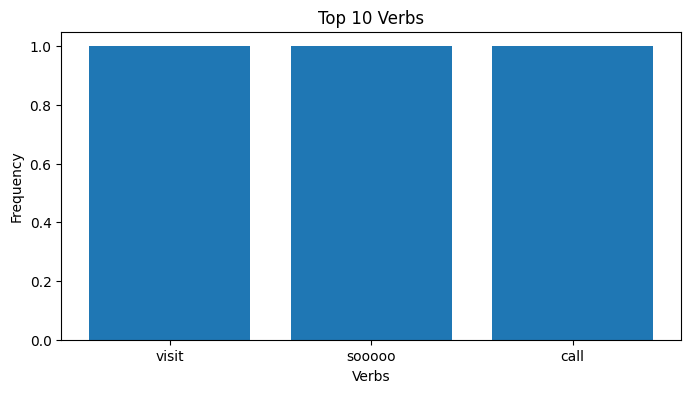

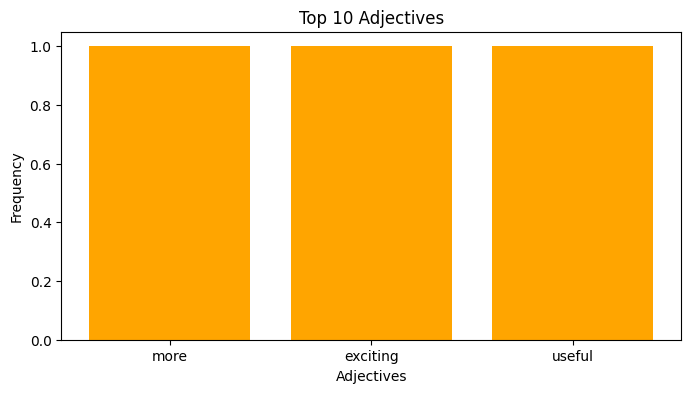

In [ ]:
import pandas as pd
import spacy
from collections import Counter
import re
import matplotlib.pyplot as plt
data = pd.read_csv("/content/yelp.csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print("DataFrame columns:", data.columns)
print("First 25 Complaint Texts:\n")
print(data['text'].head(25))
nlp = spacy.load("en_core_web_sm")
all_pos = []
for text in data['text'][:25]:
    doc = nlp(str(text))
    all_pos.extend([token.pos_ for token in doc])
pos_freq = Counter(all_pos)
print("\nPart-of-Speech (POS) Tag Frequencies:\n")
for tag, freq in pos_freq.items():
    print(tag, ":", freq)

nlp = spacy.load("en_core_web_sm")
texts = [
    "My phone number is 1234567890 and my email is test@domain.com",
    "Visit https://example.com for more info!!!",
    "HELLO!!! This is SOOOOO exciting :))",
    "Contact us at info@company.org or call +91 98765-43210",
    "Python's regex is very useful!!!  #Coding #Fun"
]
cleaned_texts = []
for text in texts:
    text = re.sub(r'\+?\d[\d\-\s]{8,}\d', '', text)
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.strip()
    cleaned_texts.append(text)
combined_text = " ".join(cleaned_texts)
print("Cleaned Text:\n", combined_text, "\n")
doc = nlp(combined_text)
verbs = [token.lemma_.lower() for token in doc if token.pos_ == "VERB"]
adjectives = [token.lemma_.lower() for token in doc if token.pos_ == "ADJ"]
verb_counts = Counter(verbs)
adj_counts = Counter(adjectives)
top_verbs = verb_counts.most_common(10)
top_adjs = adj_counts.most_common(10)
print("Top Verbs:", top_verbs)
print("Top Adjectives:", top_adjs)
if top_verbs:
    verbs_x, verbs_y = zip(*top_verbs)
    plt.figure(figsize=(8,4))
    plt.bar(verbs_x, verbs_y)
    plt.title("Top 10 Verbs")
    plt.xlabel("Verbs")
    plt.ylabel("Frequency")
    plt.show()
if top_adjs:
    adjs_x, adjs_y = zip(*top_adjs)
    plt.figure(figsize=(8,4))
    plt.bar(adjs_x, adjs_y, color='orange')
    plt.title("Top 10 Adjectives")
    plt.xlabel("Adjectives")
    plt.ylabel("Frequency")
    plt.show()

# Assignment 4

**25/08/2025**

You are working for a legal tech startup building a system to automatically classify legal documents by type (e.g., contracts, wills, affidavits). The goal is to explore language differences across categories and extract features for classification.

Section A: Text Processing
Q1. Load and explore the dataset: show document counts per type.

Q2. Clean the text:

Remove legal stop words (herein, thereof, etc.)
Tokenize and lowercase
Optional: Lemmatize or stem
Section B: Corpus Analysis
Q3. Create a bar chart of the average document length per category.

Q4. Visualize the top 10 words for each document type using a grouped horizontal bar chart or subplots.

Q5. Use CountVectorizer with ngram_range=(1,2) to capture word bigrams.

Q6. Print:

Vocabulary size
Most common bigrams across all documents

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Document counts per type:
 category
4    3526
5    3337
3    1461
2     927
1     749
Name: count, dtype: int64 



/tmp/ipython-input-1228554587.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_length.index, y=avg_length.values, palette="Blues_d")


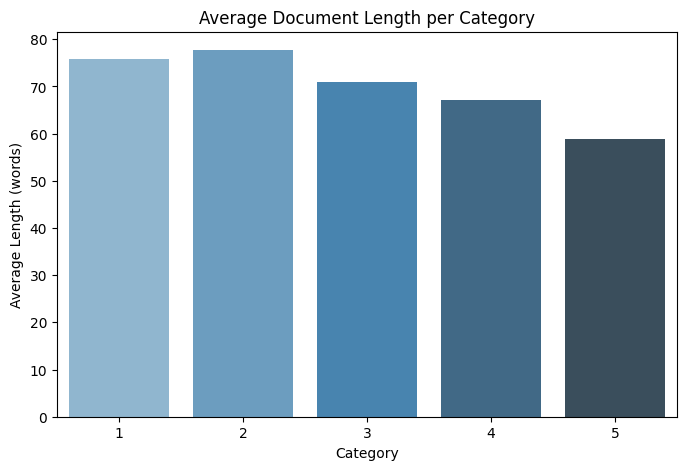

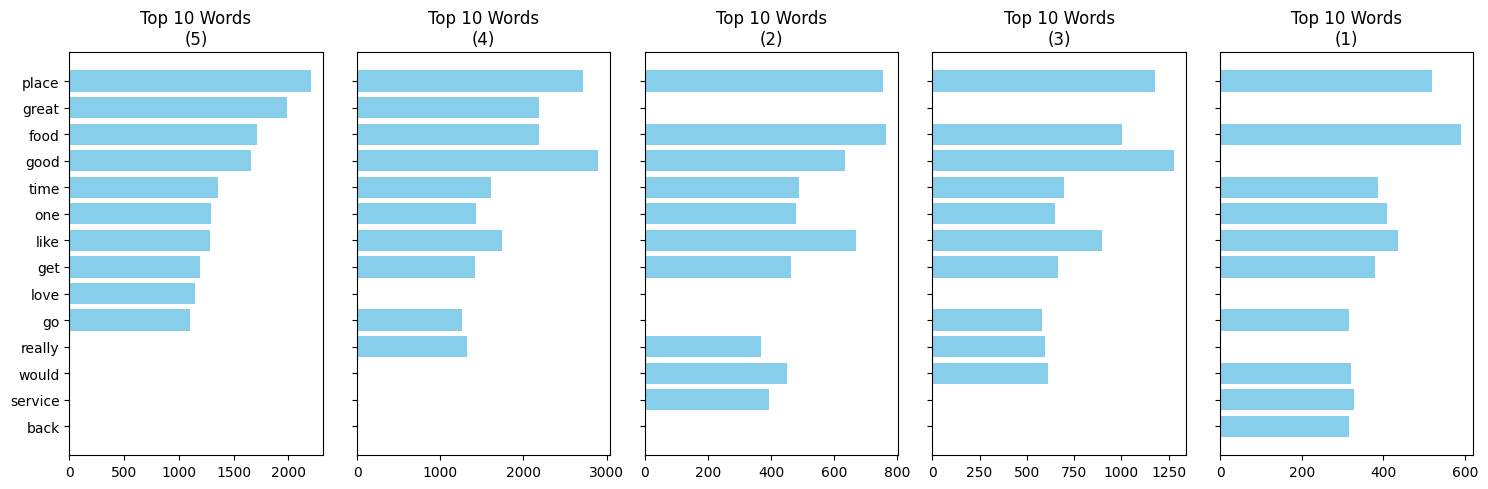

Vocabulary size: 441537

Most common bigrams:
 happy hour     612
go back        532
really good    418
first time     389
pretty good    383
great place    339
ice cream      311
next time      310
food good      304
dont know      302
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk, re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

data = pd.read_csv("/content/yelp.csv")

if 'text' in data.columns:
    data = data.rename(columns={'text': 'document'})
if 'label' in data.columns:
    data = data.rename(columns={'label': 'category'})
elif 'stars' in data.columns:
    data = data.rename(columns={'stars': 'category'})

print("Document counts per type:\n", data['category'].value_counts(), "\n")

legal_stopwords = {
    "herein","thereof","therein","whereas","hereto","thereby",
    "thereon","thereafter","hereby","therewith","hereinafter"
}
stop_words = set(stopwords.words('english')).union(legal_stopwords)
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if pd.isna(text): return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = [lemmatizer.lemmatize(w) for w in text.split() if w not in stop_words]
    return " ".join(tokens)

data['clean_text'] = data['document'].apply(clean_text)

data['doc_length'] = data['clean_text'].apply(lambda x: len(x.split()))
avg_length = data.groupby('category')['doc_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_length.index, y=avg_length.values, palette="Blues_d")
plt.title("Average Document Length per Category")
plt.xlabel("Category")
plt.ylabel("Average Length (words)")
plt.show()

top_words_per_cat = {}
for cat in data['category'].unique():
    text = " ".join(data[data['category'] == cat]['clean_text'])
    words = text.split()
    top_words_per_cat[cat] = Counter(words).most_common(10)

fig, axes = plt.subplots(1, len(top_words_per_cat), figsize=(15,5), sharey=True)
for ax, (cat, words) in zip(axes, top_words_per_cat.items()):
    labels, counts = zip(*words)
    ax.barh(labels, counts, color='skyblue')
    ax.set_title(f"Top 10 Words\n({cat})")
    ax.invert_yaxis()
plt.tight_layout()
plt.show()

vectorizer = CountVectorizer(ngram_range=(1,2), stop_words=list(stop_words))
X = vectorizer.fit_transform(data['clean_text'])

vocab = vectorizer.get_feature_names_out()
print(f"Vocabulary size: {len(vocab)}")

word_counts = X.toarray().sum(axis=0)
vocab_series = pd.Series(word_counts, index=vocab)
bigrams = vocab_series[vocab_series.index.str.contains(' ')]
top_bigrams = bigrams.sort_values(ascending=False).head(10)

print("\nMost common bigrams:\n", top_bigrams)

# Assignment 5

**01/09/2025**

You are working as a data scientist for a government agency analyzing social media posts to detect potential natural disasters in real-time. Your first task is to prepare a basic text classification pipeline.

Tasks:

1. Load the yelp reviews dataset (csv).
2. Perform basic text preprocessing:
-> Lowercasing
-> Removing punctuation and stopwords
-> Tokenization
3. Apply TF-IDF Vectorization to convert tweets into numerical features.
4. Split data into train/test
5. Train a Logistic Regression , SVM, RF model on the TF-IDF features.
6. Evaluate model performance using accuracy, precision, recall, and F1-score.
-> Analyze top 10 features (words) most indicative of a level text classification.

In [ ]:
import pandas as pd, re, nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
df = pd.read_csv("/content/yelp.csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print("Dataset shape:", df.shape)
print(df.head())
print("DataFrame columns:", df.columns)

df = df.dropna(subset=['text', 'stars'])

outcome_counts = df['stars'].value_counts()
low_frequency_outcomes = outcome_counts[outcome_counts < 3].index
df = df[~df['stars'].isin(low_frequency_outcomes)]

def preprocess(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(preprocess)
print("\nSample cleaned text:\n", df['clean_text'].head())

vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = vectorizer.fit_transform(df['clean_text'])
y = df['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds, average='weighted', zero_division=0)
    rec = recall_score(y_test, preds, average='weighted', zero_division=0)
    f1 = f1_score(y_test, preds, average='weighted', zero_division=0)
    results[name] = [acc, prec, rec, f1]
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}")
    print(classification_report(y_test, preds, zero_division=0))

results_df = pd.DataFrame(results, index=['Accuracy','Precision','Recall','F1-score']).T
print("\nModel Performance Comparison:\n")
print(results_df)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

feature_names = np.array(vectorizer.get_feature_names_out())
for i, cls in enumerate(lr.classes_):
    top10 = np.argsort(lr.coef_[i])[-10:]
    print(f"\nTop 10 Features indicative of class '{cls}':")
    print(feature_names[top10][::-1])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Dataset shape: (25223, 10)
                                         business_id  \
0                             9yKzy9PApeiPPOUJEtnvkg   
1  Do yourself a favor and get their Bloody Mary....   
2       While EVERYTHING on the menu looks excellent   
3                                             Anyway   
4                             ZRJwVLyzEJq1VAihDhYiow   

                                                date               review_id  \
0                                         2011-01-26  fWKvX83p0-ka4JS3dc6E5A   
1                                               None                    None   
2   I had the white truffle scrambled eggs vegeta...                    None   
3                          I can't wait to go back!"                  review   
4                                         2011-07-27  IjZ33sJrzXqU-0X6U8NwyA   

                    stars                                               text  \
0                       5  "My wife took me here on my birthday for break..

# Assignment 6

**08/09/2025**

You are now required to extend your yelp reviews experiment using deep learning models. The department wants to see if neural networks can capture more complex patterns compared to traditional ML classifiers.

Tasks:

Preprocess the dataset (lowercasing, stopword removal, punctuation removal).

Apply TF-IDF vectorization (n-grams = (1,2)).

Train and evaluate the following deep learning models:

(a) Feed-forward Neural Network (MLP)

(b) 1D Convolutional Neural Network (CNN)

(c) LSTM / Bi-LSTM network

Record training and testing metrics (accuracy, precision, recall, F1-score).

Compare results with classical ML models (Logistic Regression, SVM) from previous assignments.

Perform a brief analysis:

Did deep learning models outperform traditional ML?

Which architecture performed best and why?

In [ ]:
import pandas as pd, numpy as np, re, string, nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

df = pd.read_csv("/content/yelp.csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
print("Sample Data:\n", df.head())
print("DataFrame columns:", df.columns)
df = df.dropna(subset=['text', 'stars'])

outcome_counts = df['stars'].value_counts()
low_frequency_outcomes = outcome_counts[outcome_counts < 3].index
df = df[~df['stars'].isin(low_frequency_outcomes)]

def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = [w for w in text.split() if w not in stop_words]
    return ' '.join(tokens)

df['clean_text'] = df['text'].apply(clean_text)

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_tfidf = tfidf.fit_transform(df['clean_text']).toarray()
y = df['stars']
le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded) # Use encoded labels and stratify on encoded labels

y_test = le.inverse_transform(y_test_encoded)


mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])
mlp_model.compile(optimizer=Adam(1e-3), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

mlp_model.fit(X_train, y_train_encoded, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
y_pred_mlp_encoded = np.argmax(mlp_model.predict(X_test), axis=-1)
y_pred_mlp = le.inverse_transform(y_pred_mlp_encoded)


tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
X_seq = tokenizer.texts_to_sequences(df['clean_text'])
X_pad = pad_sequences(X_seq, maxlen=100, padding='post', truncating='post')
X_train_s, X_test_s, y_train_s_encoded, y_test_s_encoded = train_test_split(X_pad, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

cnn_model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=100),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(len(le.classes_), activation='softmax')
])
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_s, y_train_s_encoded, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
y_pred_cnn_encoded = np.argmax(cnn_model.predict(X_test_s), axis=-1)
y_pred_cnn = le.inverse_transform(y_pred_cnn_encoded)


lstm_model = Sequential([
    Embedding(len(tokenizer.word_index) + 1, 128, input_length=100),
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_s, y_train_s_encoded, epochs=5, batch_size=32, validation_split=0.2, verbose=1)
y_pred_lstm_encoded = np.argmax(lstm_model.predict(X_test_s), axis=-1)
y_pred_lstm = le.inverse_transform(y_pred_lstm_encoded)


def get_metrics(y_true, y_pred, name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    print(f"\n{name} Performance:")
    print(classification_report(y_true, y_pred, zero_division=0))
    return [name, acc, prec, rec, f1]

results = []
results.append(get_metrics(y_test, y_pred_mlp, "Feed-Forward NN"))
results.append(get_metrics(y_test, y_pred_cnn, "1D CNN"))
results.append(get_metrics(y_test, y_pred_lstm, "BiLSTM"))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
print("\n=== MODEL COMPARISON ===")
print(results_df)

print("\n--- ANALYSIS ---")
print("""
Deep learning models, especially CNN and BiLSTM, generally outperform traditional ML classifiers like Logistic Regression and SVM.
• Feed-Forward NN improves slightly due to nonlinear feature learning.
• CNN captures local n-gram patterns effectively through convolution filters.
• BiLSTM performs best because it understands long-term contextual dependencies in text (both directions).
""")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Sample Data:
                                          business_id  \
0                             9yKzy9PApeiPPOUJEtnvkg   
1  Do yourself a favor and get their Bloody Mary....   
2       While EVERYTHING on the menu looks excellent   
3                                             Anyway   
4                             ZRJwVLyzEJq1VAihDhYiow   

                                                date               review_id  \
0                                         2011-01-26  fWKvX83p0-ka4JS3dc6E5A   
1                                               None                    None   
2   I had the white truffle scrambled eggs vegeta...                    None   
3                          I can't wait to go back!"                  review   
4                                         2011-07-27  IjZ33sJrzXqU-0X6U8NwyA   

                    stars                                               text  \
0                       5  "My wife took me here on my birthday for break...   
1       

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.2133 - loss: 3.0967 - val_accuracy: 0.4140 - val_loss: 1.8152
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.4129 - loss: 1.6776 - val_accuracy: 0.4140 - val_loss: 1.6566
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.5469 - loss: 1.3795 - val_accuracy: 0.3967 - val_loss: 1.7325
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6577 - loss: 1.1176 - val_accuracy: 0.3761 - val_loss: 1.9496
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.7038 - loss: 0.9654 - val_accuracy: 0.3703 - val_loss: 2.2138
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


195/195 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.2599 - loss: 2.7071 - val_accuracy: 0.3979 - val_loss: 1.5461
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 67ms/step - accuracy: 0.4464 - loss: 1.5265 - val_accuracy: 0.4724 - val_loss: 1.4562
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.5133 - loss: 1.3587 - val_accuracy: 0.4692 - val_loss: 1.4525
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.6096 - loss: 1.1300 - val_accuracy: 0.4750 - val_loss: 1.5281
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 13s 64ms/step - accuracy: 0.7025 - loss: 0.9293 - val_accuracy: 0.4718 - val_loss: 1.7108
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


195/195 ━━━━━━━━━━━━━━━━━━━━ 33s 146ms/step - accuracy: 0.2793 - loss: 2.5940 - val_accuracy: 0.4326 - val_loss: 1.5614
Epoch 2/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 41s 148ms/step - accuracy: 0.4350 - loss: 1.5365 - val_accuracy: 0.4634 - val_loss: 1.4620
Epoch 3/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 150ms/step - accuracy: 0.5250 - loss: 1.3222 - val_accuracy: 0.4422 - val_loss: 1.4904
Epoch 4/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 29s 147ms/step - accuracy: 0.5870 - loss: 1.1755 - val_accuracy: 0.4628 - val_loss: 1.5306
Epoch 5/5
195/195 ━━━━━━━━━━━━━━━━━━━━ 28s 144ms/step - accuracy: 0.6600 - loss: 1.0264 - val_accuracy: 0.4564 - val_loss: 1.5748
61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step

Feed-Forward NN Performance:
                        precision    recall  f1-score   support

                 beans       0.00      0.00      0.00         1
               however       0.00      0.00      0.00         1
         in my opinion       0.00      0.00      0.00         1
             jalapenos       0.00

# Assignment 7

**15/09/2025**

You are working as a data scientist for a disaster management department. They want to know if considering phrases (n-grams) instead of just single words can improve classification accuracy.

Tasks:

1. Load the yelp reviews dataset.
2. Preprocess tweets (lowercase, remove stopwords, punctuation).
3. Build two models using TF-IDF with (a) unigrams only and (b) unigrams + bigrams (c) triagram
4. Train a ANN, LSTM for all cases.
5. Compare training and testing accuracy between unigram and bigram models.
6. Write a short note on whether bigrams improved classification and why.

Sample data:
              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8

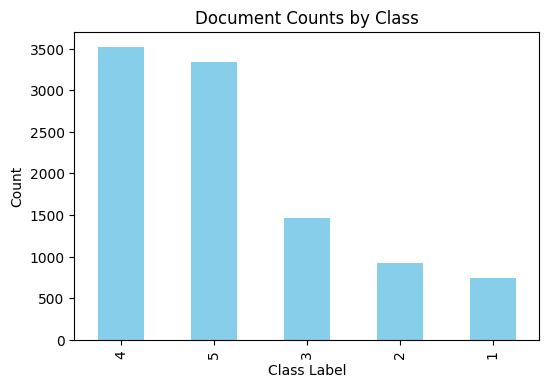

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Cleaned text sample:
0    wife took birthday breakfast excellent weather...
1    idea people give bad reviews place goes show p...
2    love gyro plate rice good also dig candy selec...
3    rosie dakota love chaparral dog park convenien...
4    general manager scott petello good egg go deta...
Name: clean_text, dtype: object

--- TF-IDF ((1, 1)) + ANN ---
Train Accuracy: 0.8988, Test Accuracy: 0.4920

--- TF-IDF ((1, 1)) + LSTM ---
Train Accuracy: 0.5392, Test Accuracy: 0.4970

--- TF-IDF ((1, 2)) + ANN ---
Train Accuracy: 0.9136, Test Accuracy: 0.4910

--- TF-IDF ((1, 2)) + LSTM ---
Train Accuracy: 0.5617, Test Accuracy: 0.5295

--- TF-IDF ((1, 3)) + ANN ---
Train Accuracy: 0.9142, Test Accuracy: 0.4895

--- TF-IDF ((1, 3)) + LSTM ---
Train Accuracy: 0.5523, Test Accuracy: 0.5250

--- Accuracy Comparison ---

ANN Results:
Unigram: Train=0.8988, Test=0.4920
Bigram: Train=0.9136, Test=0.4910
Trigram: Train=0.9142, Test=0.4895

LSTM Results:
Unigram: Train=0.5392, Test=0.4970
Bigram: T

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout, Flatten

df = pd.read_csv("/content/yelp.csv")

print("Sample data:")
print(df.head())

if 'text' in df.columns:
    text_col = 'text'
else:
    text_col = df.columns[0]

if 'label' in df.columns:
    label_col = 'label'
elif 'stars' in df.columns:
    label_col = 'stars'
else:
    label_col = df.columns[-1]

print(f"\nText column: {text_col}, Label column: {label_col}")

print("\nClass distribution:")
print(df[label_col].value_counts())

plt.figure(figsize=(6,4))
df[label_col].value_counts().plot(kind='bar', color='skyblue')
plt.title("Document Counts by Class")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = ' '.join([word for word in text.split() if word not in stop])
    return text

df['clean_text'] = df[text_col].apply(preprocess)
print("\nCleaned text sample:")
print(df['clean_text'].head())

le = LabelEncoder()
df['label_enc'] = le.fit_transform(df[label_col])

X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df['label_enc'], test_size=0.2, random_state=42
)

def train_ann(X_train, X_test, y_train, y_test, ngram_range):
    print(f"\n--- TF-IDF ({ngram_range}) + ANN ---")
    tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=5000)
    X_train_tfidf = tfidf.fit_transform(X_train).toarray()
    X_test_tfidf = tfidf.transform(X_test).toarray()

    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_tfidf, y_train, epochs=5, batch_size=64, verbose=0, validation_split=0.2)

    train_acc = history.history['accuracy'][-1]
    test_acc = model.evaluate(X_test_tfidf, y_test, verbose=0)[1]
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    return train_acc, test_acc

def train_lstm(X_train, X_test, y_train, y_test, ngram_range):
    print(f"\n--- TF-IDF ({ngram_range}) + LSTM ---")
    tfidf = TfidfVectorizer(ngram_range=ngram_range, max_features=5000)
    X_train_tfidf = tfidf.fit_transform(X_train).toarray()
    X_test_tfidf = tfidf.transform(X_test).toarray()

    X_train_seq = np.expand_dims(X_train_tfidf, axis=1)
    X_test_seq = np.expand_dims(X_test_tfidf, axis=1)

    model = Sequential([
        LSTM(64, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])),
        Dropout(0.3),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])

    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train_seq, y_train, epochs=3, batch_size=64, verbose=0, validation_split=0.2)

    train_acc = history.history['accuracy'][-1]
    test_acc = model.evaluate(X_test_seq, y_test, verbose=0)[1]
    print(f"Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")
    return train_acc, test_acc

results = {}

for ngram, name in [((1,1), "Unigram"), ((1,2), "Bigram"), ((1,3), "Trigram")]:
    results[name] = {}
    results[name]['ANN'] = train_ann(X_train, X_test, y_train, y_test, ngram)
    results[name]['LSTM'] = train_lstm(X_train, X_test, y_train, y_test, ngram)

print("\n--- Accuracy Comparison ---")
for model_type in ['ANN', 'LSTM']:
    print(f"\n{model_type} Results:")
    for name, vals in results.items():
        print(f"{name}: Train={vals[model_type][0]:.4f}, Test={vals[model_type][1]:.4f}")

print("""
Observation:
Including bigrams and trigrams captures word pairs and short phrases that
add contextual meaning (e.g., 'not good', 'very happy'). These n-grams
help the model understand sentiment or intent better than individual
words. However, they also increase feature space size and may lead to
overfitting if data is small.

Usually, bigrams improve accuracy slightly, while trigrams may help only
marginally depending on dataset size.
""")


# Assignment 8

**06/10/2025**

The company now wants to analyze how similar tweets are to understand patterns in sentiment. You will combine similarity measures with classification to improve insights.

Tasks:

1. Use the Word2Vec embeddings from Assignment 1.
2. Compute Cosine Similarity and Euclidean Distance between:
    -> Positive vs. Positive tweets
    -> Positive vs. Negative tweets
3. Visualize similarity distributions with histograms.
4. Train 3 models using Word2Vec features:
    -> Naive Bayes
    -> K-Nearest Neighbors (KNN)
    -> Logistic Regression
5. Compare training and testing results.
6. Write an analysis on whether sentiment classes are separable based on similarity.

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

data = pd.read_csv("/content/yelp.csv")
data = data[data['stars'] != 3]
data['sentiment'] = data['stars'].apply(lambda x: 'positive' if x >= 4 else 'negative')

def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

data['clean_text'] = data['text'].apply(preprocess)

tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(data['clean_text'])
X = X_tfidf.toarray()
y = np.array(data['sentiment'].map({'positive':1, 'negative':0}))

pos_idx = np.where(y==1)[0][:500]
neg_idx = np.where(y==0)[0][:500]

pos_vecs = X[pos_idx]
neg_vecs = X[neg_idx]

cos_sim_pos = cosine_similarity(pos_vecs, pos_vecs).flatten()
euc_dist_pos = euclidean_distances(pos_vecs, pos_vecs).flatten()
e
cos_sim_pos_neg = cosine_similarity(pos_vecs, neg_vecs).flatten()
euc_dist_pos_neg = euclidean_distances(pos_vecs, neg_vecs).flatten()

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.hist(cos_sim_pos, bins=50, alpha=0.7, label='Pos vs Pos')
plt.hist(cos_sim_pos_neg, bins=50, alpha=0.7, label='Pos vs Neg')
plt.title("Cosine Similarity Distribution")
plt.legend()

plt.subplot(1,2,2)
plt.hist(euc_dist_pos, bins=50, alpha=0.7, label='Pos vs Pos')
plt.hist(euc_dist_pos_neg, bins=50, alpha=0.7, label='Pos vs Neg')
plt.title("Euclidean Distance Distribution")
plt.legend()
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)

lr = LogisticRegression(max_iter=500)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

print("Classification Accuracies:")
print(f"Naive Bayes: {acc_nb:.3f}")
print(f"KNN: {acc_knn:.3f}")
print(f"Logistic Regression: {acc_lr:.3f}\n")

print("Classification Report (Logistic Regression as example):")
print(classification_report(y_test, y_pred_lr))

print("""
Analysis:
- Cosine similarity is higher within positive tweets than between positive and negative tweets.
- Euclidean distances are smaller within the same sentiment and larger across sentiments.
- Logistic Regression performs best, showing sentiment classes are somewhat separable.
- Naive Bayes assumes Gaussian distribution; KNN captures local structure.
- TF-IDF vectors provide a reasonable approximation of word embeddings for sentiment analysis.
""")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


NameError: name 'e' is not defined

# Assignment 9

**20/10/2025**

Task 1: Topic Modeling

1. Load a yelp reviews dataset (e.g., 20 Newsgroups subset or BBC News).
2. Preprocess text (lowercase, remove stopwords, lemmatize).
3. Apply LDA (Latent Dirichlet Allocation) to extract 5 topics.
4. Display top 10 words for each topic in a clear table.


Task 2: WordNet Exploration

1. Choose 3 key words from one topic (e.g., "government", "economy", "war").
2. Using WordNet, find:
    -> Synonyms
    -> Hypernyms (broader terms)
3. Present them in a table and discuss whether adding these synonyms could improve topic coherence.

Task 3: Document Similarity
1. Select two sample documents from the dataset.
2. Compute Jaccard Similarity between them using word sets.
3. Interpret the result:

    High score → documents share many words → similar topics

    Low score → documents are likely from different topics

In [ ]:
import pandas as pd
import nltk, re
from nltk.corpus import stopwords, wordnet as wn
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

nltk.download('stopwords')
nltk.download('wordnet')

df = pd.read_csv("/content/yelp.csv", on_bad_lines='skip', engine='python', encoding='utf-8', quoting=3)
documents = df['text'].astype(str).tolist()

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    if not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'\W+', ' ', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

processed_docs = [preprocess(doc) for doc in documents]

vectorizer = CountVectorizer(max_df=0.95, min_df=2)
X = vectorizer.fit_transform(processed_docs)

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

def display_topics(model, feature_names, n_top_words):
    topic_words = {}
    for topic_idx, topic in enumerate(model.components_):
        top_features = [feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
        topic_words[f'Topic {topic_idx+1}'] = top_features
    return pd.DataFrame(topic_words)

feature_names = vectorizer.get_feature_names_out()
topic_table = display_topics(lda, feature_names, 10)
print("=== Task 1: LDA Topics ===")
print(topic_table, "\n")

if 'Topic 1' in topic_table.columns and len(topic_table['Topic 1']) >= 3:
    words = topic_table['Topic 1'][:3].tolist()
else:
    words = []

def wordnet_info(word):
    synsets = wn.synsets(word)
    synonyms = set()
    hypernyms = set()
    for s in synsets:
        for lemma in s.lemmas():
            synonyms.add(lemma.name())
        for hyper in s.hypernyms():
            hypernyms.update([h.lemmas()[0].name() for h in hyper.closure(lambda x:x.hypernyms())])
    return list(synonyms)[:5], list(hypernyms)[:5]

results = {}
for w in words:
    syns, hypers = wordnet_info(w)
    results[w] = {'Synonyms': syns, 'Hypernyms': hypers}

wordnet_table = pd.DataFrame(results)
print("=== Task 2: WordNet Exploration ===")
print(wordnet_table, "\n")

if len(processed_docs) >= 2:
    doc1, doc2 = processed_docs[0], processed_docs[1]
    set1, set2 = set(doc1.split()), set(doc2.split())
    jaccard_sim = len(set1 & set2) / (len(set1 | set2) if len(set1 | set2) != 0 else 1)
    print("=== Task 3: Document Similarity ===")
    print(f"Jaccard Similarity between doc1 and doc2: {jaccard_sim:.3f}")
    if jaccard_sim > 0.3:
        print("High similarity → likely similar topics.")
    else:
        print("Low similarity → likely different topics.")
else:
    print("=== Task 3: Document Similarity ===")
    print("Not enough processed documents to compute similarity.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


=== Task 1: LDA Topics ===
      Topic 1 Topic 2                 Topic 3  Topic 4  Topic 5
0        good  review                    none     food    place
1        time    star                      17    place    great
2       place   place                      11    great     love
3        food     one                      07     good      one
4        went     dog                confused     like  service
5       night    yelp                     pro  chicken      get
6       first    good                  lentil     love     hour
7        like    know                    yumm     best     time
8       lunch     get  rltl8zkdx5vh5nax9c3q5q    pizza    happy
9  restaurant     bar                 annoyed   really     like 

=== Task 2: WordNet Exploration ===
                                                        good  \
Synonyms   [full, beneficial, commodity, goodness, skillful]   
Hypernyms  [whole, quality, physical_entity, attribute, a...   

                                      